In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from math import factorial


def exp(x, precision=10e-100):
    S = 0
    q = np.eye(*x.shape, dtype=x.dtype)
    i = 1
    while True:
        S += q
        q = q @ x / i
        i += 1
        if np.sum(q**2) < precision**2:
            return S


class polynom:
    def __init__(self, N, depth):
        self.N = N
        self.depth = depth
        self.lnx = np.random.uniform(-1, 1, (N, N))
        self.coofs = np.random.uniform(-1, 1, depth)

    def __call__(self, x0, t):
        p = x0
        for j in range(self.depth):
            p @= exp(self.lnx * self.coofs[j] * t**j / factorial(j), precision=1e-10)
        return p


class multiplication_solver:
    def __init__(self, N):
        self.w = np.random.uniform(-1, 1, (N, N))
        self.N = N

    def solve(self, x0, dt, N):
        x = np.eye(self.N)
        state = []
        time = []
        t = 0
        for n in range(N):
            state.append(x @ x0)
            time.append(t)
            x = exp(dt * self.w @ x, precision=1e-5) @ x
            t += dt
        state.append(x @ x0)
        time.append(t)
        return time, state

In [3]:
N = 10
ms = multiplication_solver(N)

In [4]:
start_cond = np.random.uniform(-1, 1, N)

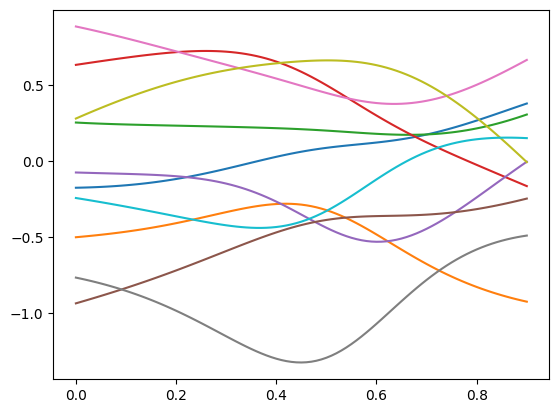

In [5]:
plt.plot(*ms.solve(start_cond, 0.01, 90))
plt.show()

C:\Users\Squmon\AppData\Local\Temp\ipykernel_3932\852865053.py:7: RuntimeWarning: overflow encountered in matmul
  x = np.exp(dt*np.random.uniform(-1, 1, (5, 5))) @ x


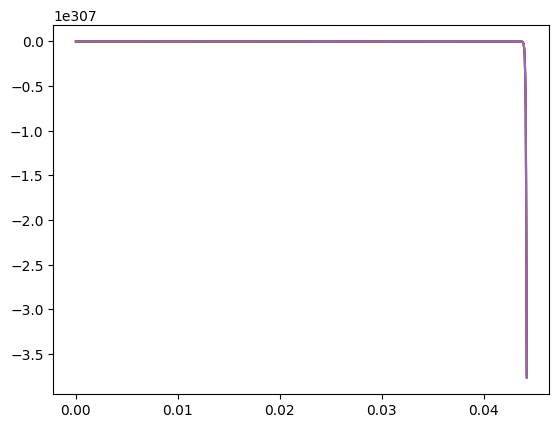

In [21]:
x = np.random.uniform(-1, 1, 5)
H = []
dt = 0.001

t = np.linspace(0, 0.1, int(1/dt))
for n in t:
    x = np.exp(dt*np.random.uniform(-1, 1, (5, 5))) @ x
    H.append(x)

plt.plot(t, H)
plt.show()